# **ENGG680 - Introduction to Digital Engineering**
## *GROUP PROJECT: PREDICTIVE MODEL FOR EFFICIENT WATER MANAGEMENT SYSTEM IN CANADA (CALGARY)*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Gayatri | An | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |
| Member 5: | First Name | Last Name | Signature | Hours | Contribution |
| Member 6: | First Name | Last Name | Signature | Hours | Contribution |
| Member 7: | First Name | Last Name | Signature | Hours | Contribution |
| Member 8: | First Name | Last Name | Signature | Hours | Contribution |


# **DATA VISUALIZATION**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 0.1: Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Step 0.2: Load Data sets

In [5]:
water_quality_data = pd.read_csv('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Water Quality Data.csv')
historical_data = pd.read_excel('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Historical Data.xlsx')
weather_data = pd.read_csv('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Weather Data.csv')
real_time_data = pd.read_excel('/content/drive/MyDrive/Engg680_Digital_Engineering_Project_Group_5/Data Cleansing/Real Time Data.xlsx')
#Display first few rows of each data set
print("Water Quality Data:")
print(water_quality_data.head())

print("Historical Data:")
print(historical_data.head())

print("Weather Data:")
print(weather_data.head())

print("Real-Time Data:")
print(real_time_data.head())

Water Quality Data:
        Date  IRON DISSOLVED  OXYGEN DISSOLVED (FIELD METER)  PH (FIELD)  \
0  1/20/2014            0.06                       13.560000    7.980000   
1  1/21/2014            0.06                       13.554627    7.978149   
2  1/22/2014            0.06                       13.542525    7.979391   
3  1/23/2014            0.06                       13.530448    7.980630   
4  1/24/2014            0.06                       13.518394    7.981867   

   TEMPERATURE WATER  TURBIDITY  ZINC DISSOLVED  Day_of_Year  Day  
0          -0.030000   3.100000        1.430000           20   20  
1          -0.202312   3.403106        1.484332           21   21  
2          -0.366397   3.667098        1.480835           22   22  
3          -0.529686   3.930075        1.477341           23   23  
4          -0.692182   4.192037        1.473849           24   24  
Historical Data:
        Date  Day_of_Year    Year  Day  \
0 2014-01-01          1.0  2014.0  1.0   
1 2014-01-02  

### 1. Creating Plots for Data Collected

Step 1.1: Visualizing Water Quality Data

--- Visualizing Water Quality Data ---


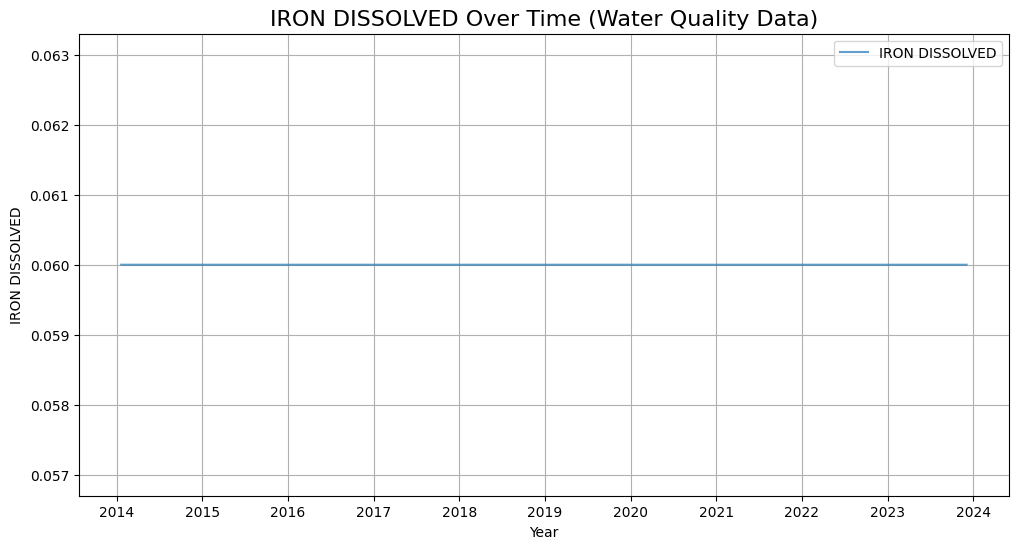

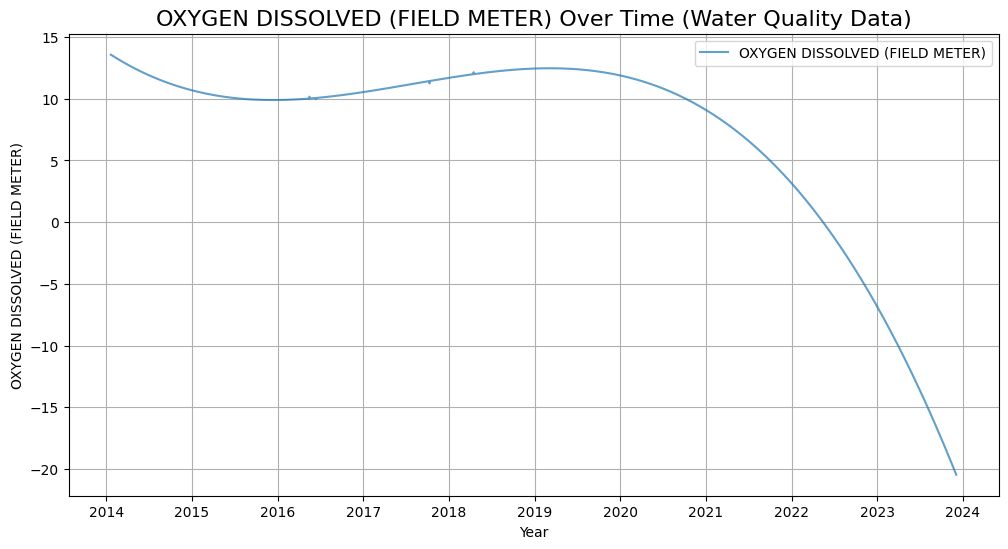

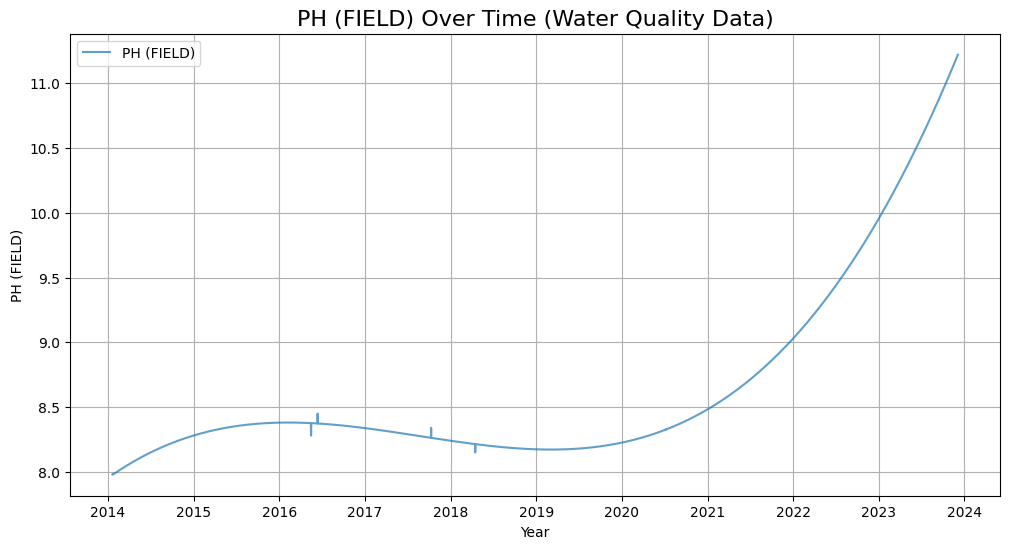

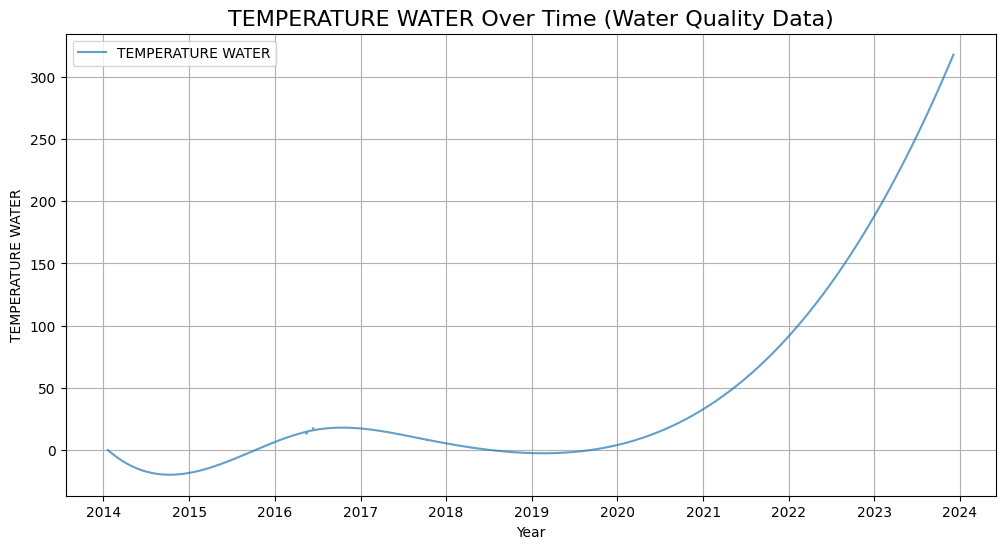

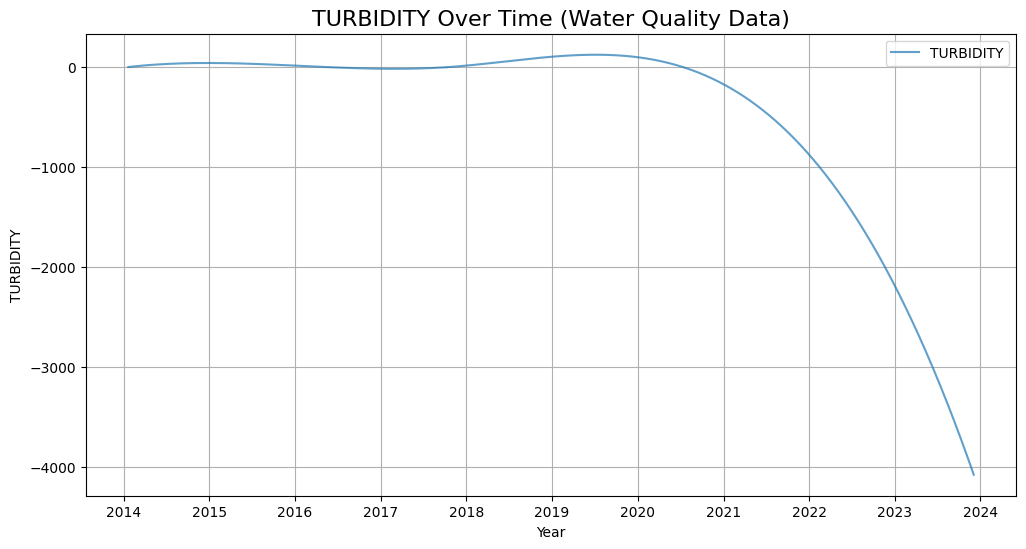

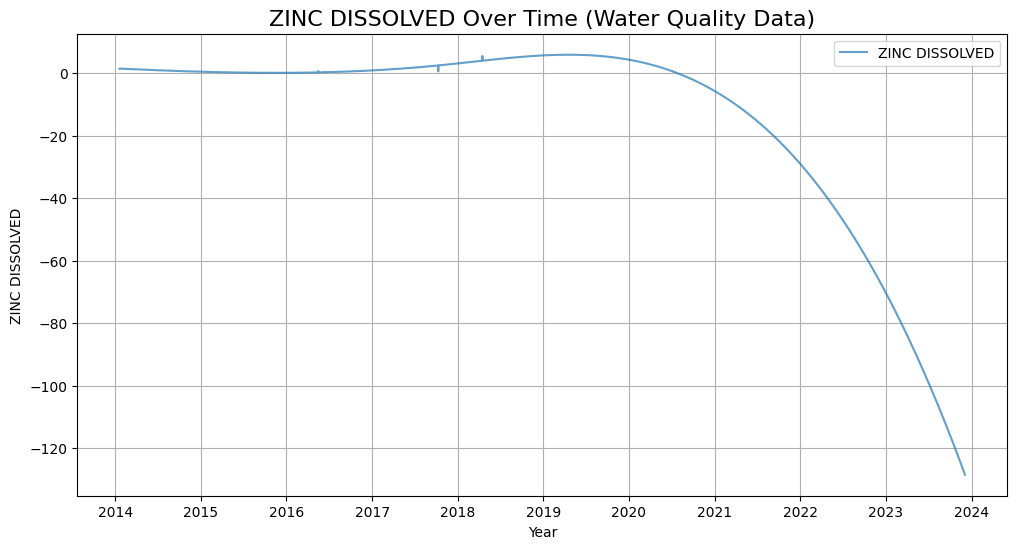

In [6]:
print("--- Visualizing Water Quality Data ---")

# Ensure 'Date' is in datetime format
water_quality_data['Date'] = pd.to_datetime(water_quality_data['Date'], errors='coerce')

# Select numeric features excluding day-related columns
water_quality_features = water_quality_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Day_of_Year', 'Day'])


# Line Plots
for feature in water_quality_features:
    plt.figure(figsize=(12, 6))
    plt.plot(water_quality_data['Date'], water_quality_data[feature], label=feature, alpha=0.7)
    plt.title(f'{feature} Over Time (Water Quality Data)', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()



Step 1.2: Visualizing Historical Data

--- Visualizing Historical Data ---


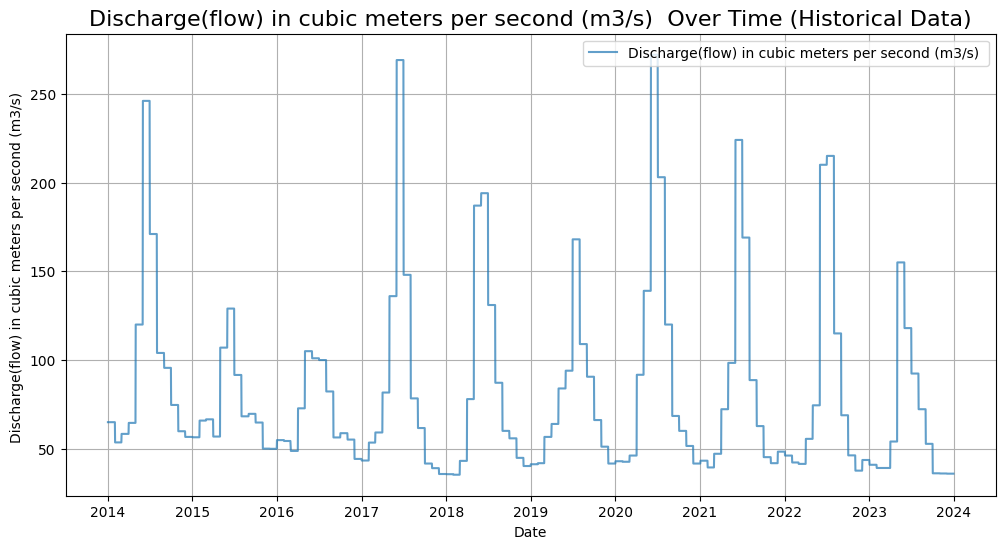

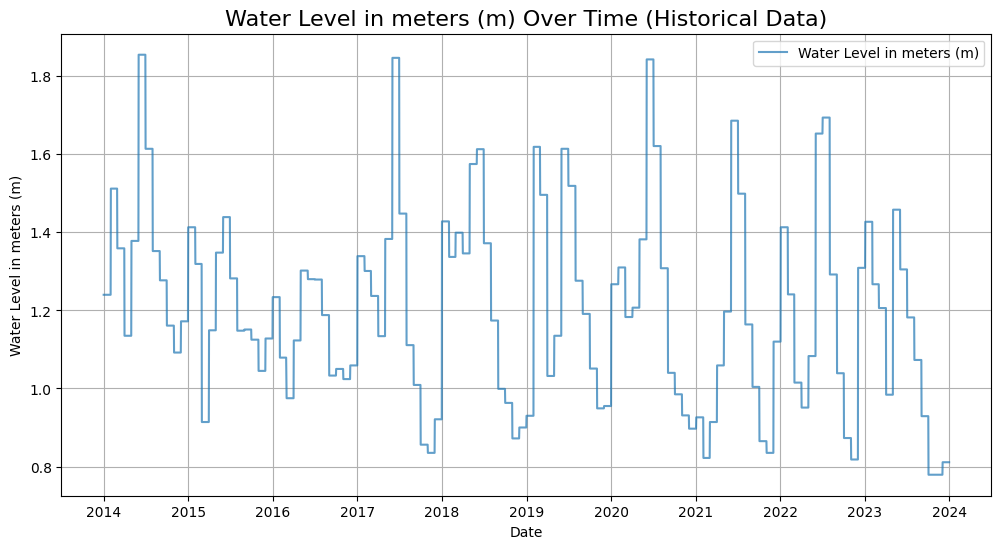

In [7]:
print("--- Visualizing Historical Data ---")

# Ensure 'Date' is in datetime format
historical_data['Date'] = pd.to_datetime(historical_data['Date'], errors='coerce')

# Select numeric features excluding 'Year', 'Day_of_Year', and 'Day'
historical_features = historical_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Year', 'Day_of_Year', 'Day'])

# Line Plots
for feature in historical_features:
    plt.figure(figsize=(12, 6))
    plt.plot(historical_data['Date'], historical_data[feature], label=feature, alpha=0.7)
    plt.title(f'{feature} Over Time (Historical Data)', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid()
    plt.show()

Step 1.3: Visualizing Weather Data

Visualizing Line Plots for Weather Data


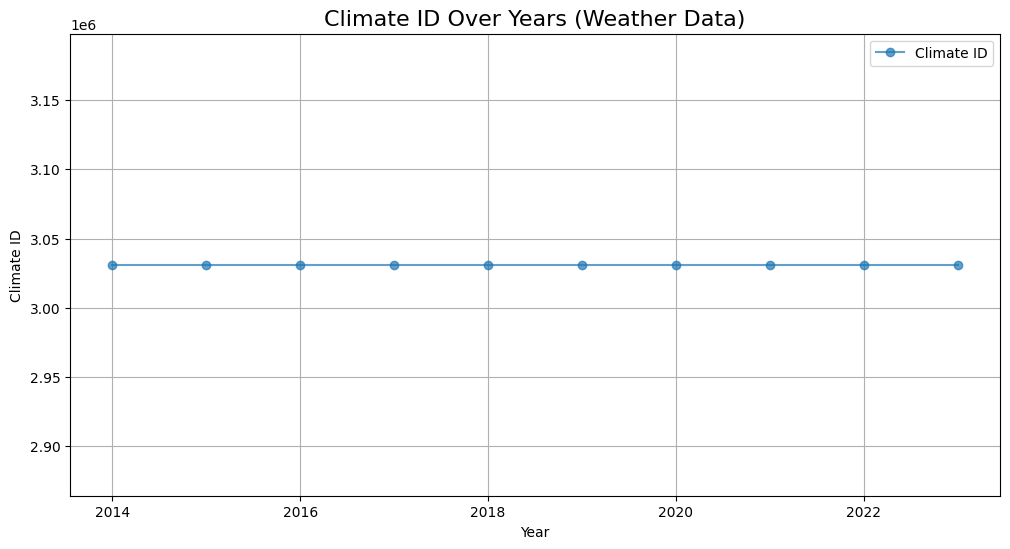

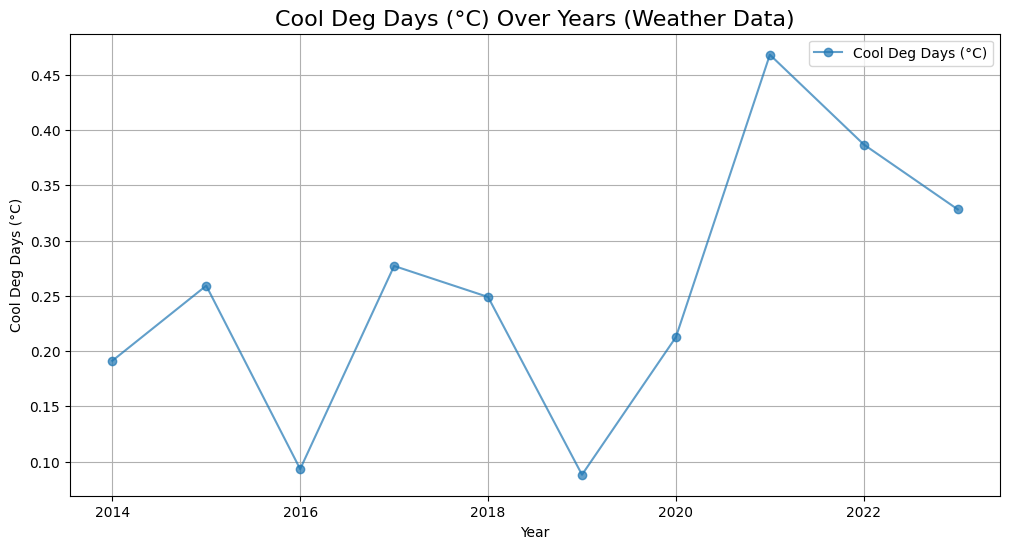

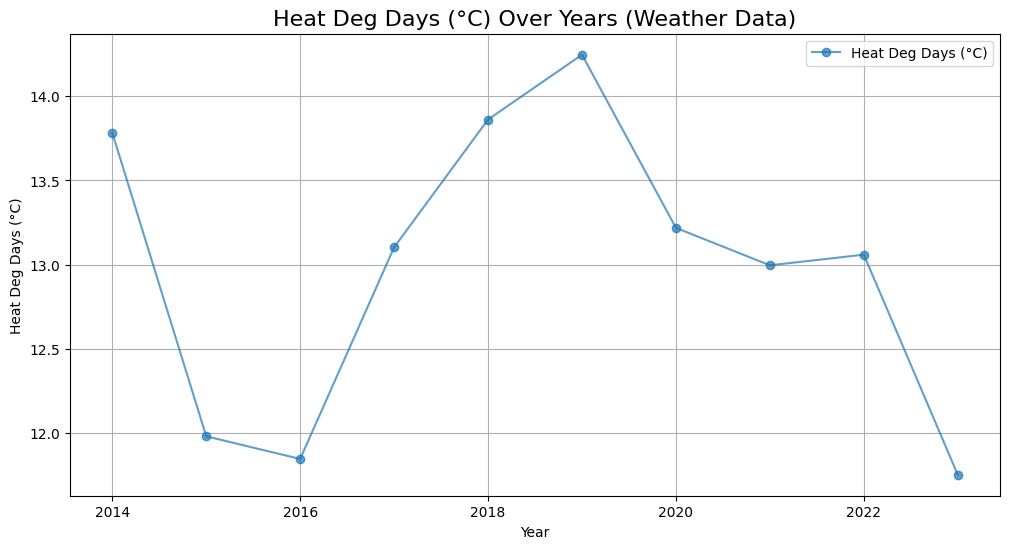

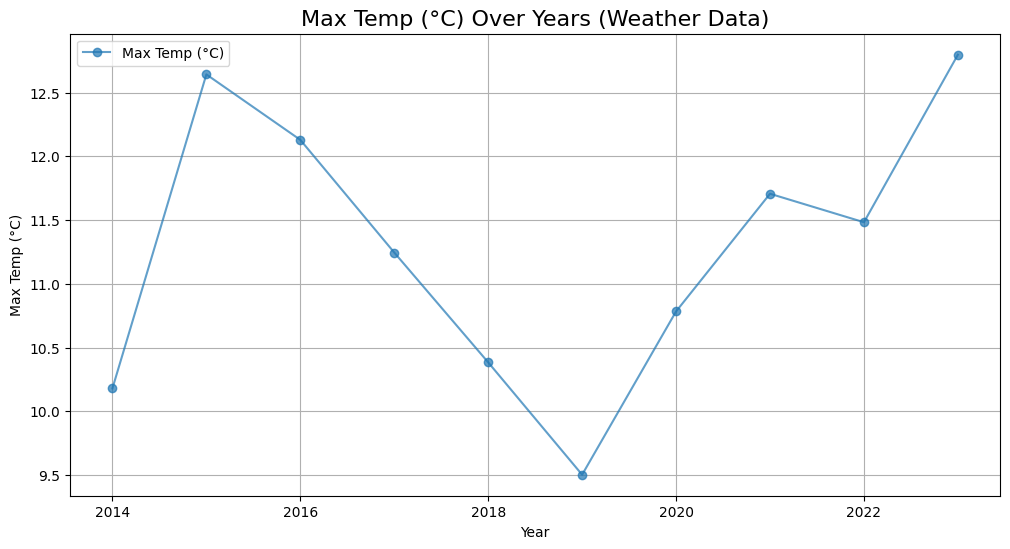

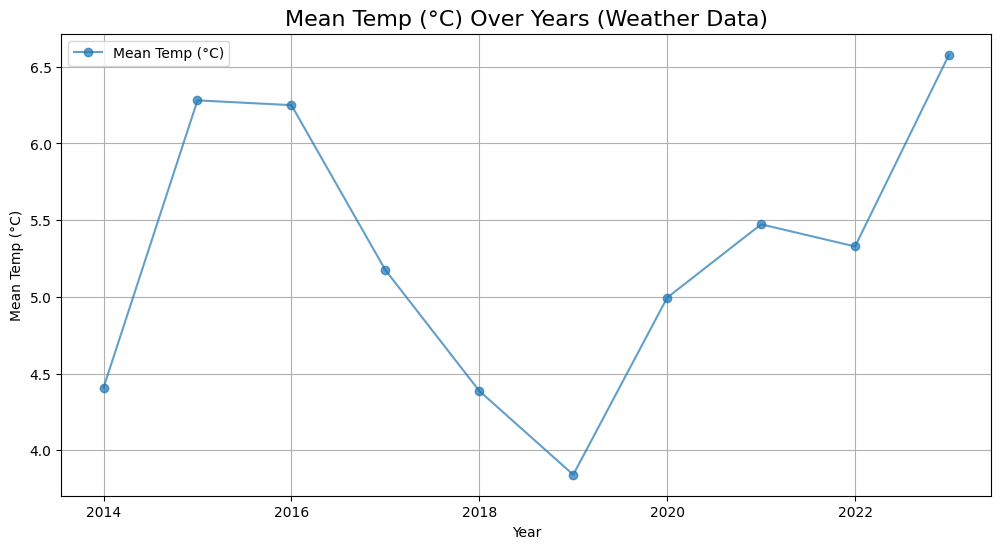

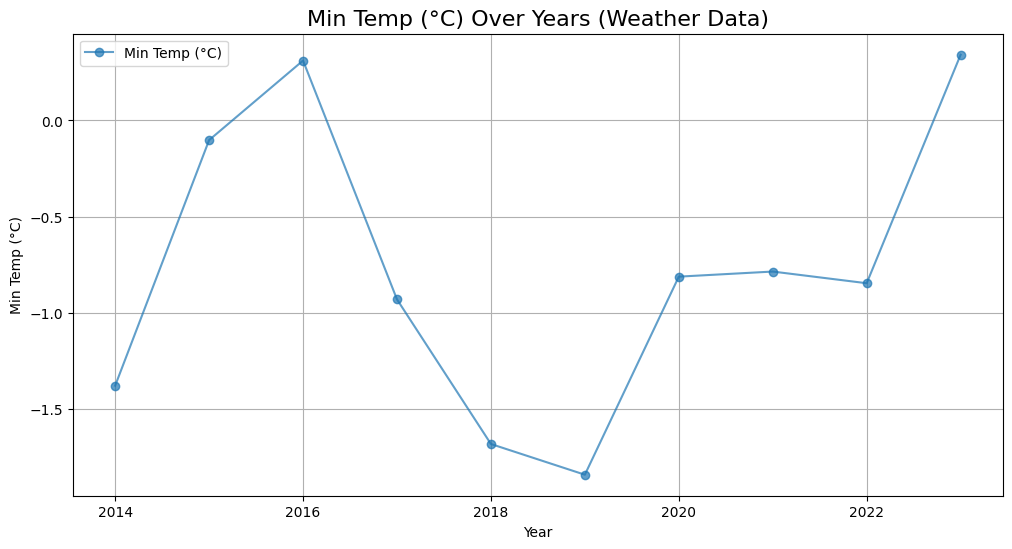

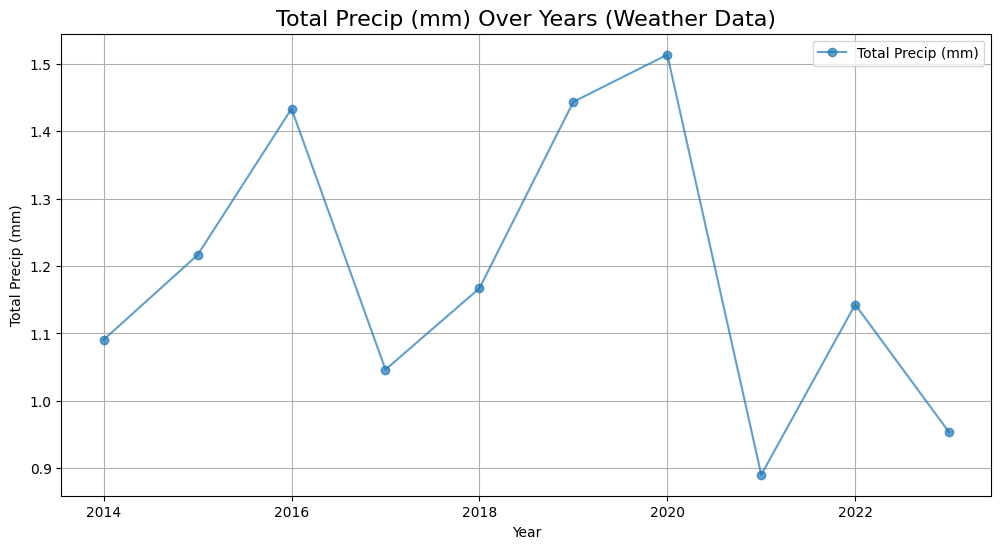

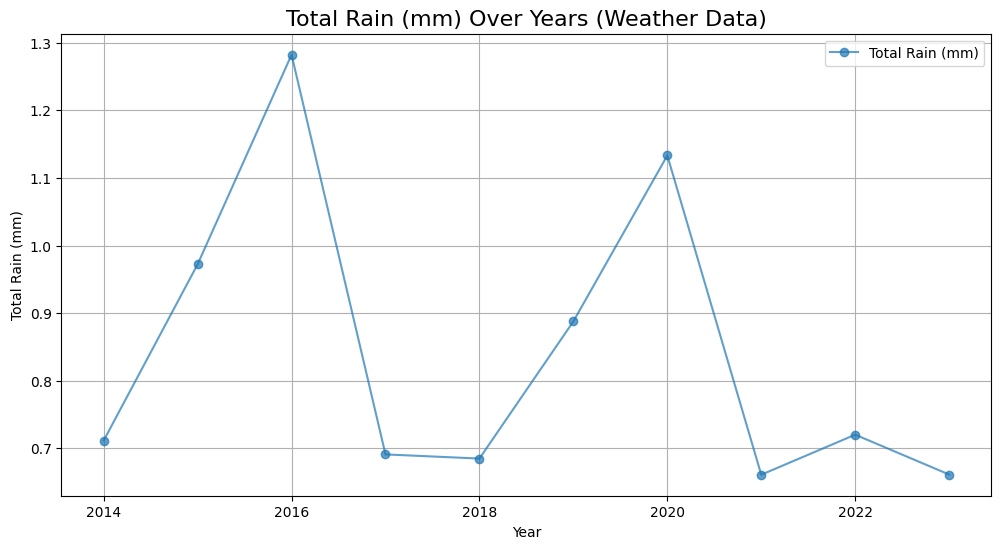

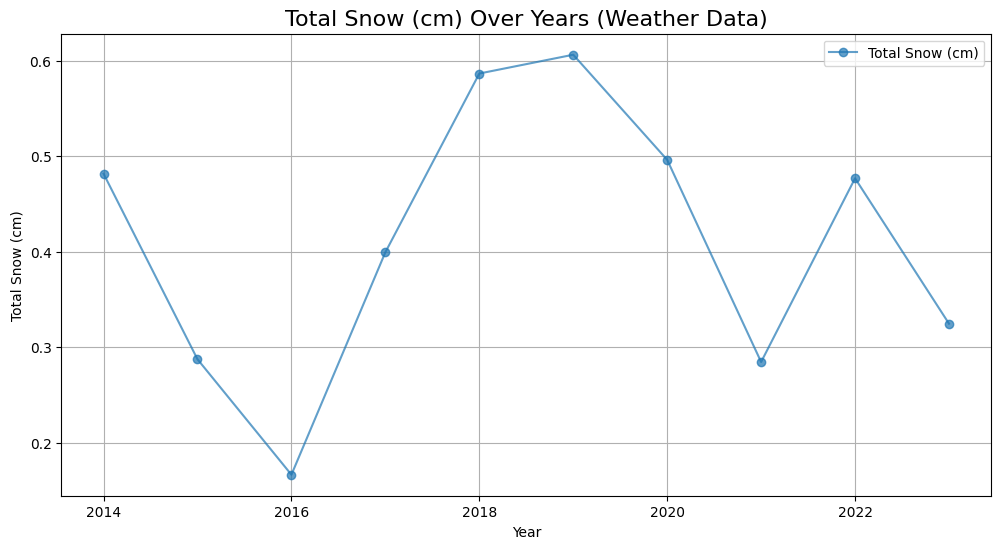

In [8]:
print("Visualizing Line Plots for Weather Data")

# Ensure 'Date' is in datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

# Extract the 'Year' from the 'Date' column
weather_data['Year'] = weather_data['Date'].dt.year

# Select numeric features excluding irrelevant columns
weather_features = weather_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Longitude (x)', 'Latitude (y)', 'Day_of_Year', 'Day'])

# Aggregate features by year using the mean
annual_data = weather_data.groupby('Year')[weather_features].mean().reset_index()

# Plot line plots for each feature against Year
for feature in weather_features:
    plt.figure(figsize=(12, 6))
    plt.plot(annual_data['Year'], annual_data[feature], label=feature, marker='o', alpha=0.7)
    plt.title(f'{feature} Over Years (Weather Data)', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.grid()
    plt.legend()
    plt.show()


Step 1.4: Visualizing Real Time Data

Visualizing Water Level and Discharge of Real-Time Data


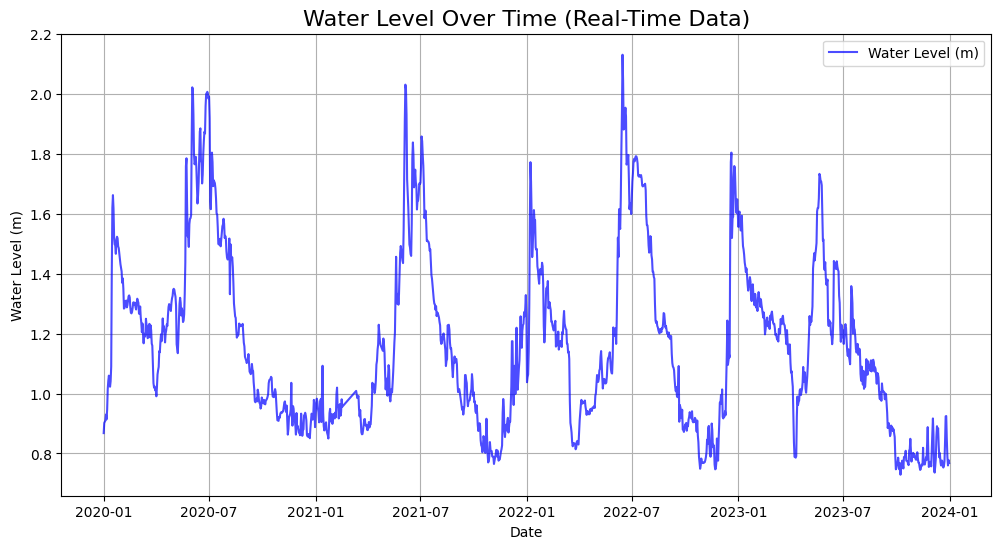

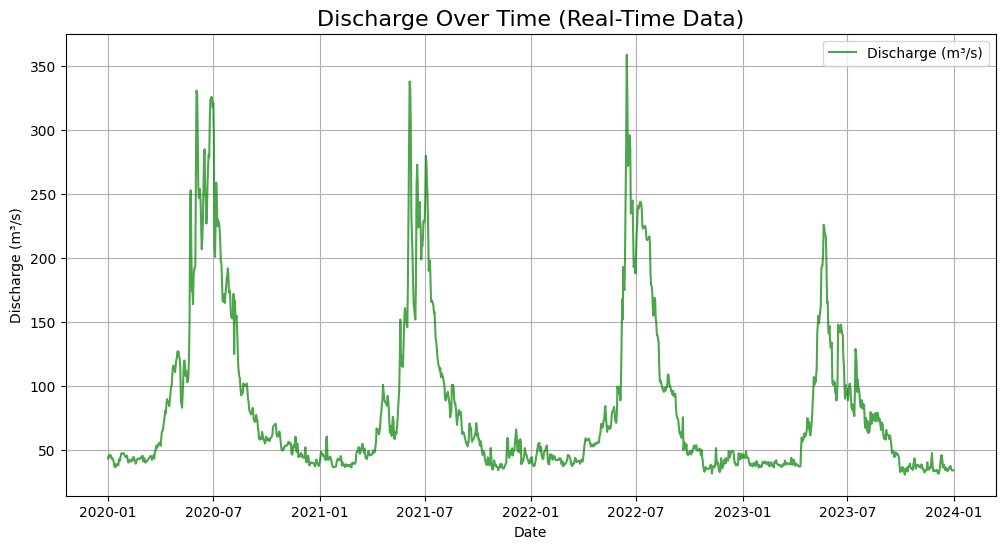

In [9]:
print("Visualizing Water Level and Discharge of Real-Time Data")

# Ensure 'Date/Time' is in datetime format
real_time_data['Date'] = pd.to_datetime(real_time_data['Date'], errors='coerce')

# Plot Water Level
plt.figure(figsize=(12, 6))
plt.plot(real_time_data['Date'], real_time_data['Water Level Daily Mean Value (m)'], label='Water Level (m)', color='blue', alpha=0.7)
plt.title('Water Level Over Time (Real-Time Data)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid()
plt.show()

# Plot Discharge
plt.figure(figsize=(12, 6))
plt.plot(real_time_data['Date'], real_time_data['Discharge Daily Mean Value (m3/s)'], label='Discharge (m³/s)', color='green', alpha=0.7)
plt.title('Discharge Over Time (Real-Time Data)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Discharge (m³/s)')
plt.legend()
plt.grid()
plt.show()

# **Model Development without Real Time Data (Part 1)**

### 2. Linear Regression Model


Step 2.1: Preprocessing: Ensure date compatibility and merge datasets

In [10]:
water_quality_data['Date'] = pd.to_datetime(water_quality_data['Date'])
historical_data['Date'] = pd.to_datetime(historical_data['Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Drop duplicate or irrelevant columns before merging
historical_data = historical_data.drop(columns=['Year', 'Day'], errors='ignore')
weather_data = weather_data.drop(columns=['Year', 'Day'], errors='ignore')

# Merge datasets based on 'Day_of_Year'
merged_dataset = (
    water_quality_data
    .merge(historical_data, left_on='Day_of_Year', right_on='Day_of_Year', how='inner')
    .merge(weather_data, left_on='Day_of_Year', right_on='Day_of_Year', how='inner')
)

# Target variable
target_column = "Discharge(flow) in cubic meters per second (m3/s) "

# Prepare features and target
features = merged_dataset.drop(
    columns=['Sample Date', 'Date/Time_x', 'Date/Time_y', 'Day', target_column], errors='ignore'
)
target = merged_dataset[target_column]

# Select only numeric features
features = features.select_dtypes(include=['float64', 'int64'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Step 2.2: Model Training and Performance Evaluation

In [11]:
rf_model_optimized = LinearRegression()
rf_model_optimized.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = rf_model_optimized.predict(X_test)

# Evaluate the model's performance
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)


# Display results
print('MSE = ', mse_optimized)
print('R² = ', r2_optimized)

MSE =  708.4168676229259
R² =  0.7357078763503719


Step 2.3: Visualising Results

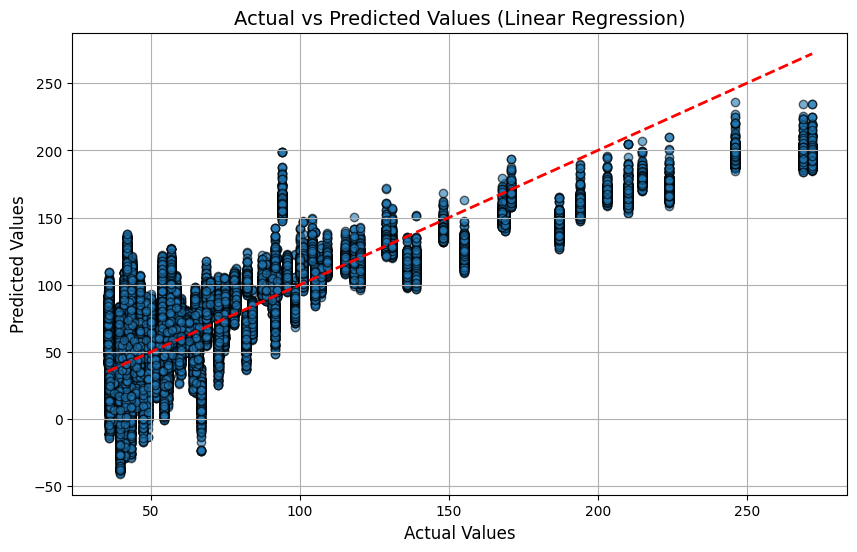

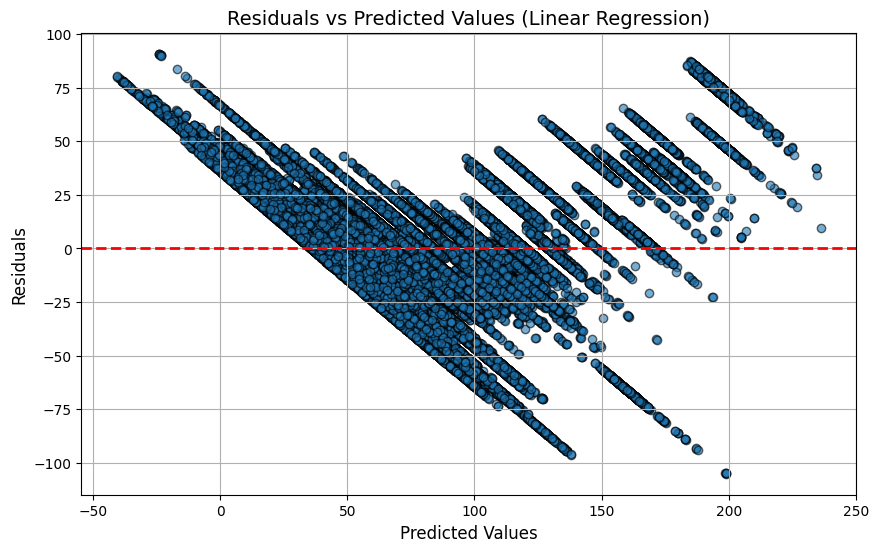

In [12]:
# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values (Linear Regression)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

# Compute residuals for Linear Regression
residuals = y_test - y_pred_optimized

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_optimized, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs Predicted Values (Linear Regression)', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()

Step 2.4: Apply K4 Method

In [13]:
# Ensure the 'Year' column is present in the dataset
if 'Year' not in merged_dataset.columns:
    merged_dataset['Year'] = pd.to_datetime(merged_dataset['Date']).dt.year

# Define the target column and feature columns
target_column = "Discharge(flow) in cubic meters per second (m3/s) "
feature_columns = merged_dataset.select_dtypes(include=['float64', 'int64']).columns.drop(
    ['Year', target_column], errors='ignore'
)

# Function for K4 method including MSE using Linear Regression
def k4_linear_regression_with_mse(data, target_column, feature_columns):
    results = []
    years = sorted(data['Year'].unique())

    for i in range(0, len(years) - 3, 2):  # 2-year training, 2-year testing
        train_years = years[i:i+2]
        test_years = years[i+2:i+4]

        train_data = data[data['Year'].isin(train_years)]
        test_data = data[data['Year'].isin(test_years)]

        X_train = train_data[feature_columns]
        y_train = train_data[target_column]
        X_test = test_data[feature_columns]
        y_test = test_data[target_column]

        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)

        y_pred = lr_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({'Train Years': train_years, 'Test Years': test_years, 'MSE': mse, 'R²': r2})

    return results

# Apply the K4 method with MSE
k4_results_with_mse = k4_linear_regression_with_mse(merged_dataset, target_column, feature_columns)

# Convert results to a DataFrame
k4_results_with_mse_df = pd.DataFrame(k4_results_with_mse)

print(k4_results_with_mse_df)

    Train Years    Test Years         MSE        R²
0  [2014, 2015]  [2016, 2017]  886.581505  0.671953
1  [2016, 2017]  [2018, 2019]  696.348088  0.742177
2  [2018, 2019]  [2020, 2021]  722.206575  0.732774
3  [2020, 2021]  [2022, 2023]  728.323281  0.730338


Step 2.5: Calculate the overall Performance Metrics from K4 Method

In [14]:
# Function to calculate the overall MSE and R²
def calculate_overall_metrics(k4_results):
    mse_values = [result['MSE'] for result in k4_results]
    r2_values = [result['R²'] for result in k4_results]

    overall_mse = sum(mse_values) / len(mse_values)
    overall_r2 = sum(r2_values) / len(r2_values)

    return overall_mse, overall_r2

# Calculate overall metrics for Linear Regression results
overall_mse, overall_r2 = calculate_overall_metrics(k4_results_with_mse)

# Print the overall results
print(f"Overall Mean Squared Error (MSE): {overall_mse}")
print(f"Overall R-Squared (R²): {overall_r2}")

Overall Mean Squared Error (MSE): 758.3648621850704
Overall R-Squared (R²): 0.7193105185604529


Step 2.6: Visualising K4 Method Results

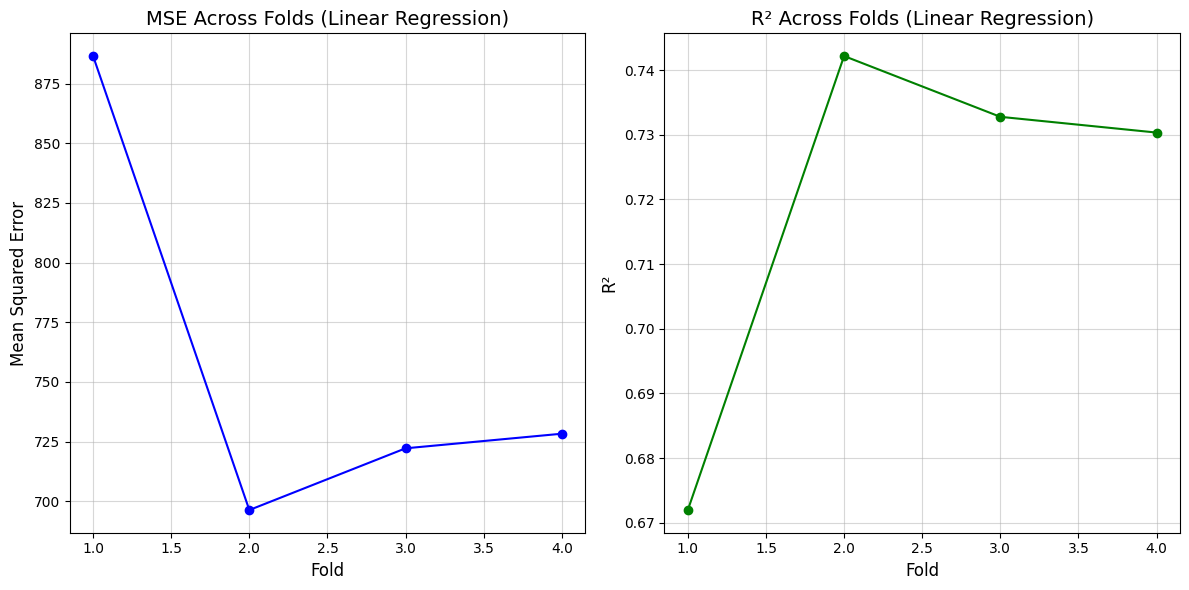

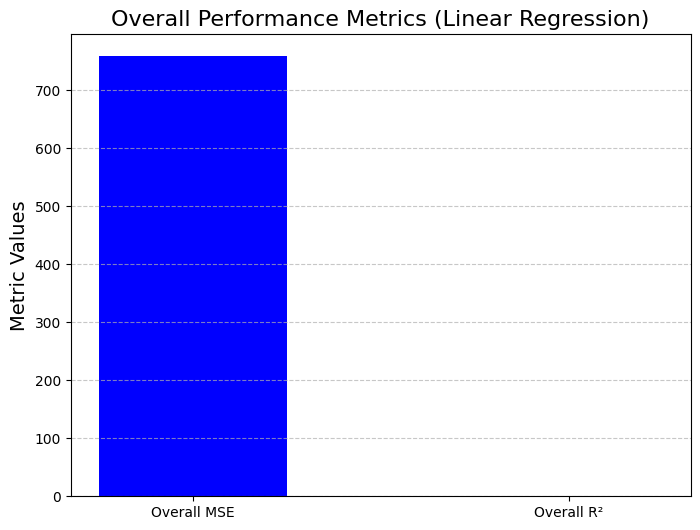

In [15]:
# Prepare data for visualization
mse_values = [result['MSE'] for result in k4_results_with_mse]
r2_values = [result['R²'] for result in k4_results_with_mse]
folds = range(1, len(k4_results_with_mse) + 1)

# Visualizing MSE and R² for each fold
plt.figure(figsize=(12, 6))

# Plot MSE for each fold
plt.subplot(1, 2, 1)
plt.plot(folds, mse_values, marker='o', linestyle='-', label='MSE', color='blue')
plt.title('MSE Across Folds (Linear Regression)', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(alpha=0.5)

# Plot R² for each fold
plt.subplot(1, 2, 2)
plt.plot(folds, r2_values, marker='o', linestyle='-', label='R²', color='green')
plt.title('R² Across Folds (Linear Regression)', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.grid(alpha=0.5)

# Display the plots
plt.tight_layout()
plt.show()

# Overall MSE and R² as a bar chart
overall_metrics = ['Overall MSE', 'Overall R²']
overall_values = [overall_mse, overall_r2]

plt.figure(figsize=(8, 6))
plt.bar(overall_metrics, overall_values, color=['blue', 'green'], width=0.5)
plt.title("Overall Performance Metrics (Linear Regression)", fontsize=16)
plt.ylabel("Metric Values", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Step 2.7: Comparison of Performance Metric

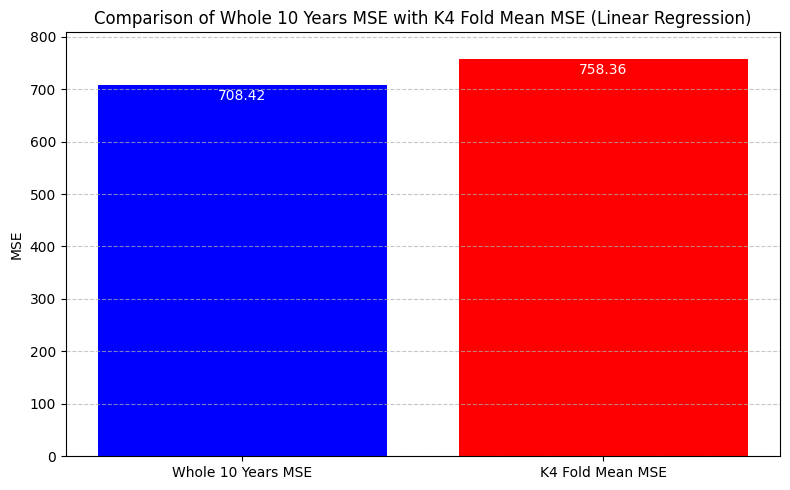

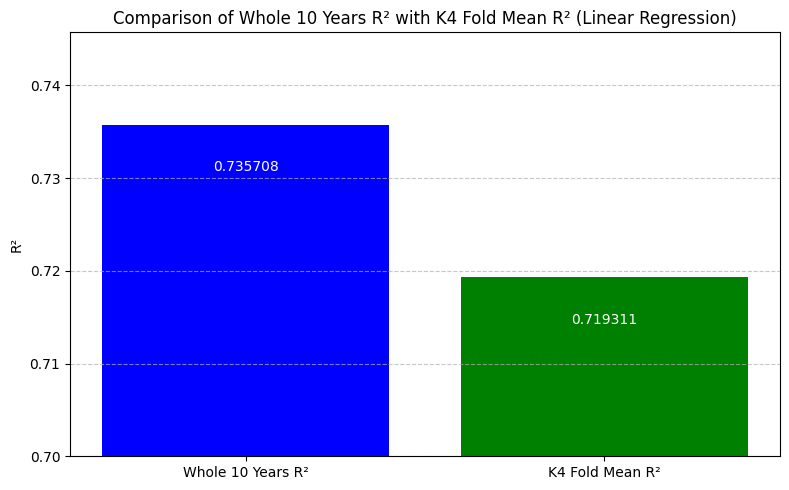

In [16]:
# Define the MSE and R² values for Linear Regression
linear_regression_mse = 708.4168676229259
linear_regression_r2 = 0.7357078763503719
k4_fold_mean_mse = 758.3648621850704
k4_fold_mean_r2 = 0.7193105185604529

# Visual comparison for MSE with updated labels for Linear Regression
plt.figure(figsize=(8, 5))
bars = plt.bar(['Whole 10 Years MSE', 'K4 Fold Mean MSE'], [linear_regression_mse, k4_fold_mean_mse], color=['blue', 'red'])
plt.title('Comparison of Whole 10 Years MSE with K4 Fold Mean MSE (Linear Regression)')
plt.ylabel('MSE')
plt.ylim(0, max(linear_regression_mse, k4_fold_mean_mse) + 50)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 30, f"{bar.get_height():.2f}", ha='center', color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visual comparison for R² with updated labels for Linear Regression
plt.figure(figsize=(8, 5))
bars = plt.bar(['Whole 10 Years R²', 'K4 Fold Mean R²'], [linear_regression_r2, k4_fold_mean_r2], color=['blue', 'green'])
plt.title('Comparison of Whole 10 Years R² with K4 Fold Mean R² (Linear Regression)')
plt.ylabel('R²')
plt.ylim(0.7, max(linear_regression_r2, k4_fold_mean_r2) + 0.01)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.005, f"{bar.get_height():.6f}", ha='center', color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Random Forest Model


Step 3.1: Model Training and Performance Evaluation

In [17]:
# Preprocessing: Ensure date compatibility and merge datasets
from sklearn.ensemble import RandomForestRegressor

water_quality_data['Date'] = pd.to_datetime(water_quality_data['Date'])
historical_data['Date'] = pd.to_datetime(historical_data['Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Drop duplicate or irrelevant columns before merging
historical_data = historical_data.drop(columns=['Year', 'Day'], errors='ignore')
weather_data = weather_data.drop(columns=['Year', 'Day'], errors='ignore')

# Merge datasets based on 'Day_of_Year'
merged_dataset = (
    water_quality_data
    .merge(historical_data, left_on='Day_of_Year', right_on='Day_of_Year', how='inner')
    .merge(weather_data, left_on='Day_of_Year', right_on='Day_of_Year', how='inner')
)

# Target variable
target_column = "Discharge(flow) in cubic meters per second (m3/s) "

# Prepare features and target
features = merged_dataset.drop(
    columns=['Sample Date', 'Date/Time_x', 'Date/Time_y', 'Day', target_column], errors='ignore'
)
target = merged_dataset[target_column]

# Select only numeric features
features = features.select_dtypes(include=['float64', 'int64'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor with reduced estimators for optimization
rf_model_optimized = RandomForestRegressor(n_estimators=20, random_state=42)
rf_model_optimized.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = rf_model_optimized.predict(X_test)

# Evaluate the model's performance
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)


# Display results
print('MSE = ', mse_optimized)
print('R² = ', r2_optimized)

MSE =  4.817598739035445
R² =  0.9982026777455147


Step 3.2: Visualising Results

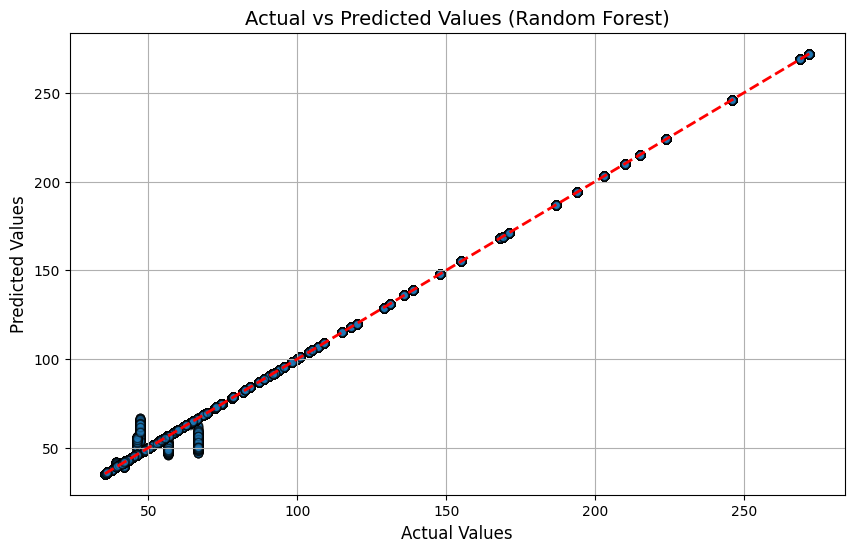

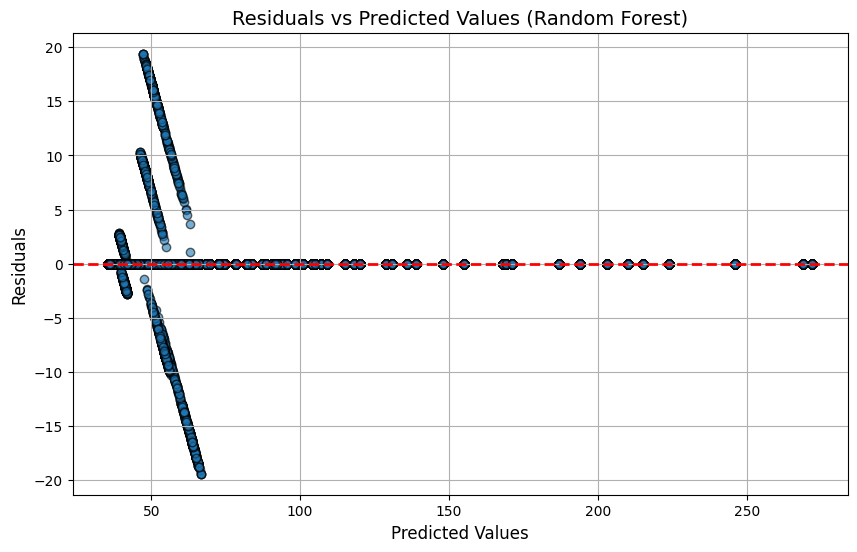

In [18]:
# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

# Compute residuals for Random Forest
residuals = y_test - y_pred_optimized

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_optimized, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()


Step 3.3: Apply K4 Method

In [19]:
# Ensure the 'Year' column is present in the dataset
if 'Year' not in merged_dataset.columns:
    merged_dataset['Year'] = pd.to_datetime(merged_dataset['Date']).dt.year

# Define the target column and feature columns
target_column = "Discharge(flow) in cubic meters per second (m3/s) "
feature_columns = merged_dataset.select_dtypes(include=['float64', 'int64']).columns.drop(
    ['Year', target_column], errors='ignore'
)

# Function for K4 method including MSE
def k4_random_forest_with_mse(data, target_column, feature_columns):
    results = []
    years = sorted(data['Year'].unique())

    for i in range(0, len(years) - 3, 2):  # 2-year training, 2-year testing
        train_years = years[i:i+2]
        test_years = years[i+2:i+4]

        train_data = data[data['Year'].isin(train_years)]
        test_data = data[data['Year'].isin(test_years)]

        X_train = train_data[feature_columns]
        y_train = train_data[target_column]
        X_test = test_data[feature_columns]
        y_test = test_data[target_column]

        rf_model = RandomForestRegressor(n_estimators=20, random_state=42)
        rf_model.fit(X_train, y_train)

        y_pred = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append({'Train Years': train_years, 'Test Years': test_years, 'MSE': mse, 'R²': r2})

    return results

# Apply the K4 method with MSE
k4_results_with_mse = k4_random_forest_with_mse(merged_dataset, target_column, feature_columns)

# Convert results to a DataFrame
k4_results_with_mse_df = pd.DataFrame(k4_results_with_mse)

print(k4_results_with_mse_df)



    Train Years    Test Years       MSE        R²
0  [2014, 2015]  [2016, 2017]  3.989002  0.998524
1  [2016, 2017]  [2018, 2019]  4.100082  0.998482
2  [2018, 2019]  [2020, 2021]  2.548726  0.999057
3  [2020, 2021]  [2022, 2023]  5.276237  0.998046


Step 3.4: Calculate the overall Performance Metrics from K4 Method

In [20]:
# Function to calculate the overall MSE and R²
def calculate_overall_metrics(k4_results):
    mse_values = [result['MSE'] for result in k4_results]
    r2_values = [result['R²'] for result in k4_results]

    overall_mse = sum(mse_values) / len(mse_values)
    overall_r2 = sum(r2_values) / len(r2_values)

    return overall_mse, overall_r2

# Calculate overall metrics
overall_mse, overall_r2 = calculate_overall_metrics(k4_results_with_mse)

# Print the overall results
print(f"Overall Mean Squared Error (MSE): {overall_mse}")
print(f"Overall R-Squared (R²): {overall_r2}")


Overall Mean Squared Error (MSE): 3.9785117174531366
Overall R-Squared (R²): 0.9985273421453769


Step 3.5: Visualising K4 Method Results

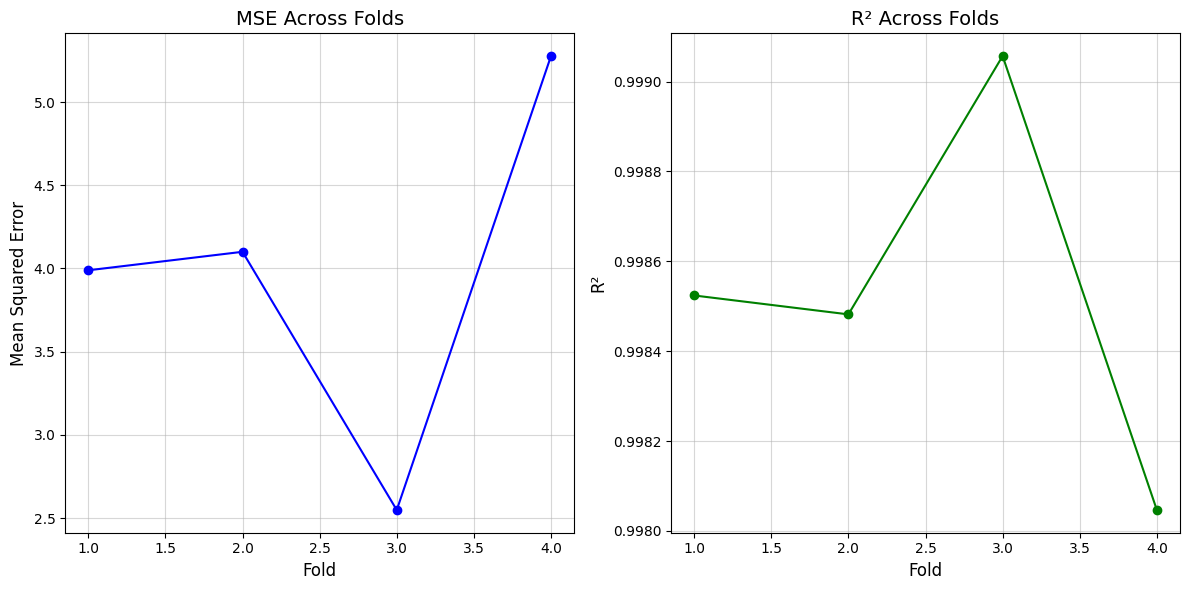

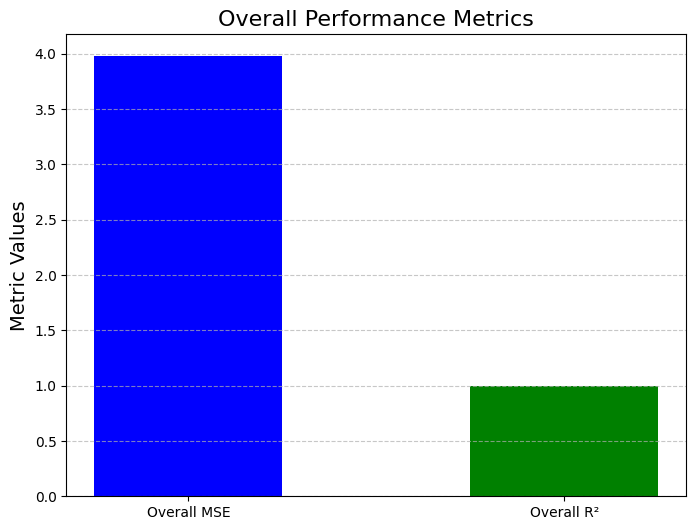

In [21]:
# Prepare data for visualization
mse_values = [result['MSE'] for result in k4_results_with_mse]
r2_values = [result['R²'] for result in k4_results_with_mse]
folds = range(1, len(k4_results_with_mse) + 1)

# Visualizing MSE and R² for each fold
plt.figure(figsize=(12, 6))

# Plot MSE for each fold
plt.subplot(1, 2, 1)
plt.plot(folds, mse_values, marker='o', linestyle='-', label='MSE', color='blue')
plt.title('MSE Across Folds', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.grid(alpha=0.5)

# Plot R² for each fold
plt.subplot(1, 2, 2)
plt.plot(folds, r2_values, marker='o', linestyle='-', label='R²', color='green')
plt.title('R² Across Folds', fontsize=14)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.grid(alpha=0.5)

# Display the plots
plt.tight_layout()
plt.show()

# Overall MSE and R² as a bar chart
overall_metrics = ['Overall MSE', 'Overall R²']
overall_values = [overall_mse, overall_r2]

plt.figure(figsize=(8, 6))
plt.bar(overall_metrics, overall_values, color=['blue', 'green'], width=0.5)
plt.title("Overall Performance Metrics", fontsize=16)
plt.ylabel("Metric Values", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Step 3.6: Comparison of Performance Metric

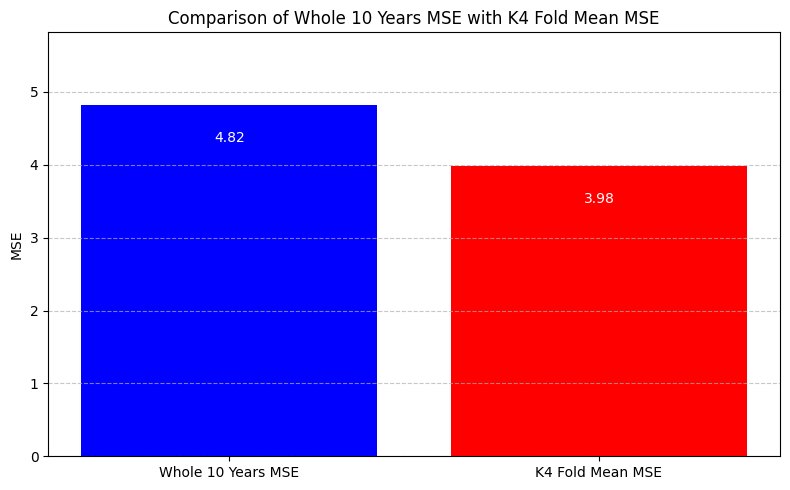

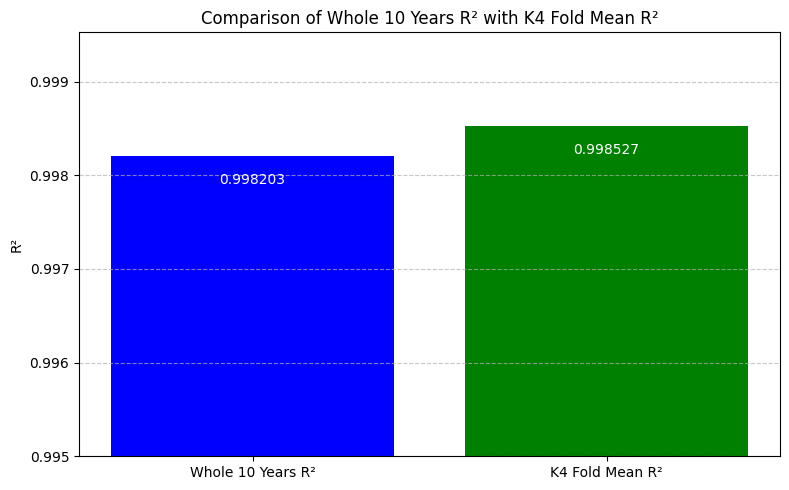

In [23]:
# Visual comparison for MSE with updated labels
individual_mse = mse_optimized
individual_r2 = r2_optimized
plt.figure(figsize=(8, 5))

bars = plt.bar(['Whole 10 Years MSE', 'K4 Fold Mean MSE'], [individual_mse, overall_mse], color=['blue', 'red'])
plt.title('Comparison of Whole 10 Years MSE with K4 Fold Mean MSE')
plt.ylabel('MSE')
plt.ylim(0, max(individual_mse, overall_mse) + 1)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.5, f"{bar.get_height():.2f}", ha='center', color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visual comparison for R² with updated labels
plt.figure(figsize=(8, 5))
bars = plt.bar(['Whole 10 Years R²', 'K4 Fold Mean R²'], [individual_r2, overall_r2], color=['blue', 'green'])
plt.title('Comparison of Whole 10 Years R² with K4 Fold Mean R²')
plt.ylabel('R²')
plt.ylim(0.995, max(individual_r2, overall_r2) + 0.001)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.0003, f"{bar.get_height():.6f}", ha='center', color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4. Model Comparison

Step 4.1: Linear Regression vs Random Forest (Visualization)

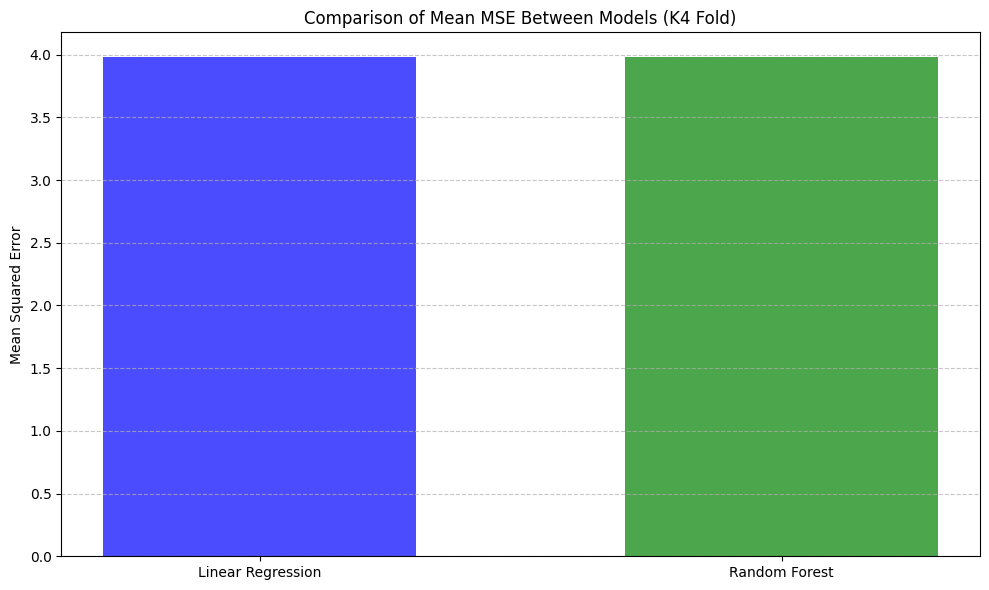

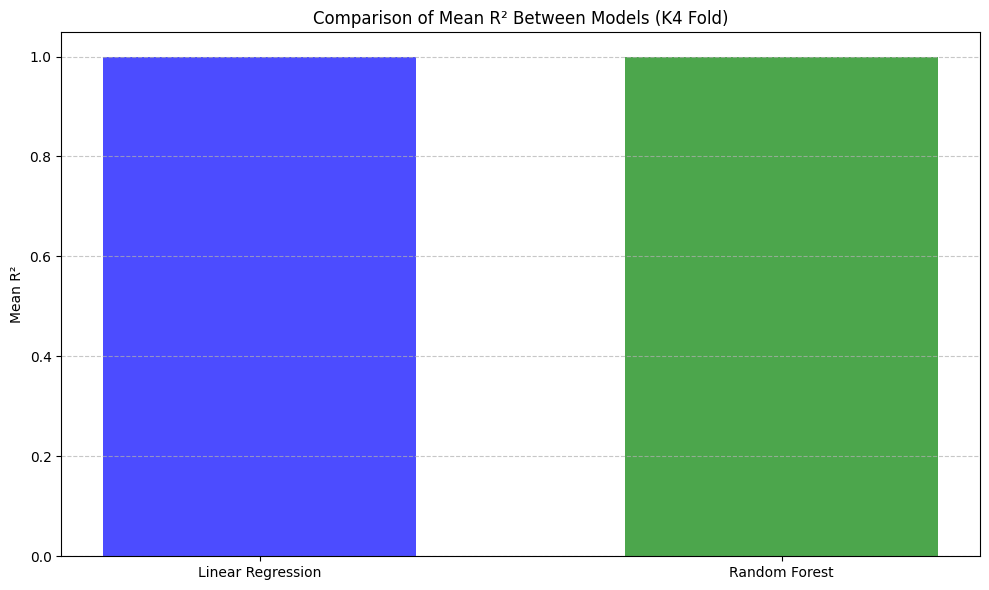

In [29]:
# Define models and their mean metrics
models = ['Linear Regression', 'Random Forest']
mse_means = [lr_mse_mean, rf_mse_mean]
r2_means = [lr_r2_mean, rf_r2_mean]

# Plot comparison for MSE
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
plt.bar(x, mse_means, color=['blue', 'green'], alpha=0.7, width=0.6)
plt.xticks(x, models)
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean MSE Between Models (K4 Fold)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot comparison for R²
plt.figure(figsize=(10, 6))
plt.bar(x, r2_means, color=['blue', 'green'], alpha=0.7, width=0.6)
plt.xticks(x, models)
plt.ylabel('Mean R²')
plt.title('Comparison of Mean R² Between Models (K4 Fold)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Step 4.2: Justfication the use of Random Forest Model

give justification :::::

### 5. Predicting Water Consumption without Real Time Data


In [ ]:
#Please Write code to predict data without using real time data

# **Model Development with Real Time Data**

### 6. Feature Engineering

(Give justification of why we using it)


Step 6.1: Preprocessing: Ensure date compatibility and merge datasets

Step 6.2: Add New Features

In [ ]:
# Add Rolling Averages

# Add Lagged Features

# Add Interaction Features

# Drop rows with NaN values resulting from rolling and lagged feature calculations

# Display the updated dataset

Step 6.3: Visualize New Features

Step 6.4: Display Heatmap

(Justify its use)

### 7. Model Development and Performance Evaluation

Step 7.1: Training both Models and Evaluating Performance

Step 7.2: Visualising Results

Step 7.3: Apply K4 Method

Step 7.4: Calculate the overall Performance Metrics from K4 Method

Step 7.5: Visualising K4 Method Results

Step 7.6: Comparison of both Model Performance Metric

(Justify Using Random Forest Model)

# **Model Comparison: Real Time Data vs Historical Data**

Step 8.1: Comparison Table Creation

Step 8.2: Visualising Results

# **Future Consumption Prediction**

Step 9.1: Predict Consumption Using Real Time Data

(Give Justification)

# **Conclusion**

(Write here)